In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from numpy import *

##  线性回归模型使用

In [10]:
data=pd.read_csv('data.csv',header=None)
data[:4]

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632


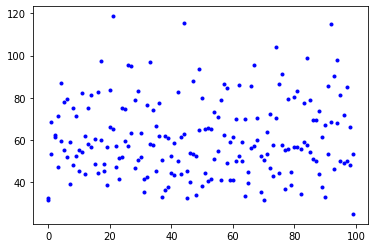

In [11]:
plt.plot(data,'b.')

In [12]:
x_data=data.iloc[:,0];   x_data_t=np.array(x_data).reshape(-1,1)
y_data=data.iloc[:,1]
lr_model=LinearRegression()
lr_model.fit(x_data_t,y_data)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

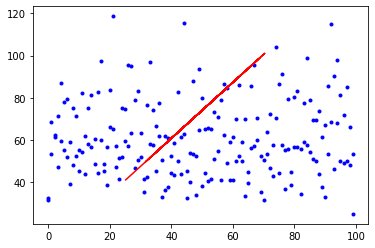

In [13]:
plt.plot(data,'b.')
plt.plot(x_data_t,lr_model.predict(x_data_t),'r')

##  逻辑回归模型使用

In [14]:
from sklearn.linear_model import LogisticRegression

def loadDataset(filename):
    fr=open(filename,'r')
    x=[]; y=[];
    i=0
    for line in fr.readlines():
        #i+=1
        currLine=line.strip().split()
        #print('======\n',currLine,len(currLine),i,'=======\n')
        arrLine=[float(line) for line in currLine]
        x.append(arrLine[:21])
        y.append(arrLine[21])
    fr.close()
    return x,y

        
    
    
   

In [15]:
x_train,y_train=loadDataset('./logisticTraining.txt')
x_test,y_test=loadDataset('./logisticTest.txt')

#Logistic Regression supports only solvers in ['liblinear', 
# 'newton-cg', 'lbfgs','sag', 'saga'], got silence.

lgr=LogisticRegression(solver='saga')
lgr.fit(x_train,y_train) 

/home/wei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(shape(x_train))
shape(y_train)

(299, 21)


(299,)

In [17]:
y_pred=lgr.predict(x_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.62      0.65      0.63        20
         1.0       0.85      0.83      0.84        47

    accuracy                           0.78        67
   macro avg       0.73      0.74      0.74        67
weighted avg       0.78      0.78      0.78        67



## 自编线性回归模型

In [ ]:
import numpy as np
 
def loadDataSet(fileName):
    dataMat=[]
    labelMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        curLine=line.strip().split('\t')
        dataMat.append(list(map(float,curLine[:-1])))
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [46]:
def standRegress(xArr,yArr):
    xMat=np.mat(xArr)
    yMat=np.mat(yArr).T
    xTx=xMat.T*xMat
    if np.linalg.det(xTx)==0.0:
        
        return
    ws=xTx.I*(xMat.T*yMat)
    return ws
 
xArr,yArr=loadDataSet('logisticTraining.txt')
ws=standRegress(xArr,yArr)



x_test,ytest=loadDataSet('logisticTest.txt')
y=x_test*ws
y_pred= [  1 if(i>=0.5)  else 0  for i in  y]

print(classification_report(y_pred,y_test))
                

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        25
           1       0.74      0.83      0.79        42

    accuracy                           0.72        67
   macro avg       0.70      0.68      0.68        67
weighted avg       0.71      0.72      0.71        67



## 自编逻辑回归模型

In [139]:

# //  梯度上升
def grad_descent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)  #(m,n)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    weights = np.ones((n, 1))  #初始化回归系数（n, 1)
    alpha = 0.001 #步长
    maxCycle = 5000  #最大循环次数

    for i in range(maxCycle):
        h = sigmoid(dataMatrix * weights)  #sigmoid 函数
        weights = weights + alpha * dataMatrix.transpose() * (labelMat - h)  #梯度
    return weights

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def stoc_grad_ascent_one(dataMatIn, classLabels, numIter=250):
    dataMatIn=np.array(dataMatIn)
    m, n = np.shape(dataMatIn)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1 + i + j) + 0.01 #保证多次迭代后新数据仍然有影响力
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatIn[i] * weights))  # 数值计算
            error = classLabels[i] - h
            weights = weights + (alpha * error )* dataMatIn[i]
            del(dataIndex[randIndex])
    return np.array(weights)

In [140]:
#模型训练
dataMatIn, classLabels = loadDataSet('logisticTraining.txt')

# 普通梯度上升
# w = grad_descent(dataMatIn, classLabels)

# 随机梯度上升
w = stoc_grad_ascent_one(dataMatIn, classLabels)

print(w[:5])
shape(w)

/home/wei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[31.90291109  1.78603803  2.45587166 -0.07318486 -0.52126603]


(21,)

In [141]:
#模型测试及评估
x_test,y_test=loadDataSet('logisticTest.txt')
y=np.matmul(x_test,w)
print(shape(y))
y_pred=[ 1 if(sigmoid( i)>=0.5)  else 0 for i in y]

print(classification_report(y_pred,y_test))
                

(67,)
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        34
           1       0.62      0.88      0.73        33

    accuracy                           0.67        67
   macro avg       0.71      0.67      0.66        67
weighted avg       0.71      0.67      0.66        67

